# Left Winger Players

In [313]:
import pandas as pd

left_wingers = pd.read_csv('left_wingers.csv')
for i in left_wingers['Player']:
    print(i)

Phil Foden
Jack Grealish
Mykhailo Mudryk
Raheem Sterling
Gabriel Martinelli
Leandro Trossard
Cody Gakpo
Diogo Jota
Marcus Rashford
Jadon Sancho
Anthony Elanga
Alejandro Garnacho
Heung-min Son
Arnaut Danjuma
Allan Saint-Maximin
Ryan Fraser
Saïd Benrahma
Maxwel Cornet
Harvey Barnes
Leon Bailey
Philippe Coutinho
Daniel Podence
Kamaldeen Sulemana
Mohamed Elyounoussi
Moussa Djenepo
Mislav Orsic
Samuel Edozie
Kaoru Mitoma
Demarai Gray
Dwight McNeil
André Ayew
Alex Mighten
Yoane Wissa
Keane Lewis-Potter
Mikkel Damsgaard
Jack Harrison
Wilfried Gnonto
Wilfried Zaha
Manor Solomon
Neeskens Kebano
Jaidon Anthony
Junior Stanislas
Kingsley Coman
Sadio Mané
Karim Adeyemi
Jamie Bynoe-Gittens
Callum Hudson-Odoi
Amine Adli
Faride Alidou
Alassane Plea
Hannes Wolf
Yvandro Borges Sanches
Jakub Kaminski
Vincenzo Grifo
Noah Weißhaupt
Jacob Bruun Larsen
Nathanaël Mbuku
Delano Burgzorg
Florian Kainz
Chidera Ejuke
Marius Bülter
Gerrit Holtmann
Christopher Antwi-Adjei
Khvicha Kvaratskhelia
Alessio Zerbin
Rafael 

# Scrape FBREF website data with Selenium Web Driver bots

In [24]:
!pip install webdriver-manager

DEPRECATION: pytorch-lightning 1.7.7 has a non-standard dependency specifier torch>=1.9.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Scraping the FBREF standard data for each player

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import time
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
# Set up the WebDriver (make sure to replace 'path/to/chromedriver' with your actual path)
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get("https://fbref.com/en/")

columns = ['Season', 'Age',	'Squad', 'Country',	'Comp',	'LgRank','MP', 'Starts', 'Min',	'90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG',
           'PrgC', 'PrgP', 'PrgR', 'Gls/90', 'Ast/90', 'G+A/90', 'G-PK/90', 'G+A-PK/90', 'xG/90', 'xAG/90', 'xG+xAG/90', 'npxG/90', 'npxG+xAG/90', 'Matches']

id_df = pd.DataFrame(columns = columns)


left_wingers = pd.read_csv('left_wingers.csv')
#left_wingers = left_wingers.iloc[130:]
for i in left_wingers['Player']:
 search_bar = driver.find_element(By.XPATH, '//*[@class="ac-input completely"]')
 print(i)
 search_bar.send_keys(i)
 search_bar.submit()
 
 time.sleep(2)

# Find the tbody element containing the rows
 tbody = driver.find_element(By.XPATH, '//*[@id="stats_standard_dom_lg"]/tbody')

# Extract the rows from the tbody (using the specific XPath for rows)
 rows = tbody.find_elements(By.TAG_NAME, 'tr')


# Extract the data from each row (excluding the header row)
 table_data = []
 for row in rows:  # Skip the header row
    th_cells = row.find_elements(By.TAG_NAME, 'th') 
    cells = row.find_elements(By.TAG_NAME, 'td')
    row_data = [cell.text.strip() for cell in th_cells] + [cell.text.strip() for cell in cells]
    
    if row_data: # Only add non-empty rows
        table_data.append(row_data)

# Convert to a pandas DataFrame for easier manipulation
 df = pd.DataFrame(table_data, columns = columns)
 df['Player'] = i
 id_df = pd.concat([df, id_df],ignore_index=True)

 
 
# Show the data
 print(id_df)

# Close the driver
driver.quit()


C:\Users\anubh\AppData\Local\Temp\ipykernel_26460\4183041478.py:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


Phil Foden
      Season Age            Squad  Country               Comp LgRank  MP  \
0  2017-2018  17  Manchester City  eng ENG   Jr. PL2 — Div. 1    6th   9   
1  2017-2018  17  Manchester City  eng ENG  1. Premier League    1st   5   
2  2018-2019  18  Manchester City  eng ENG  1. Premier League    1st  13   
3  2019-2020  19  Manchester City  eng ENG  1. Premier League    2nd  23   
4  2020-2021  20  Manchester City  eng ENG  1. Premier League    1st  28   
5  2021-2022  21  Manchester City  eng ENG  1. Premier League    1st  28   
6  2022-2023  22  Manchester City  eng ENG  1. Premier League    1st  32   
7  2023-2024  23  Manchester City  eng ENG  1. Premier League    1st  35   
8  2024-2025  24  Manchester City  eng ENG  1. Premier League    4th   9   

  Starts    Min   90s  ... G+A/90 G-PK/90 G+A-PK/90 xG/90 xAG/90 xG+xAG/90  \
0      9    810   9.0  ...   1.00    0.67      1.00                          
1      0     49   0.5  ...   1.84    0.00      1.84  0.00   0.61      0.

In [295]:
id_df['Comp'].unique()

array(['2. Ligue 2', '1. Ligue 1', '1. Veikkausliiga', '1. Super Lg',
       '1. Pro League', '2. Championship', '1. Eliteserien',
       '1. Süper Lig', '2. La Liga 2', '3. League One',
       '1. Premier League', '5. National League', '1. Bundesliga',
       'Jr. U19 Bundesliga', 'Jr. PL2', '1. Série A', '1. SuperLiga',
       '1. Allsvenskan', '1. First League', '1. Czech First League',
       '1. Eredivisie', '2. 2. Bundesliga', '1. Premiership',
       '1. Saudi Professional League', '1. La Liga', '1. Serie A',
       '1. Uruguayan Primera División', '1. Liga MX', 'Jr. PL2 — Div. 2',
       '1. Primeira Liga', '1. Super League', '2. Serie B',
       '1. First Division A', '1. HNL', '1. Pro League A', '3. 3. Liga',
       '1. Ekstraklasa', 'Jr. U17 Bundesliga', '1. MLS',
       'Jr. PL2 — Div. 1', '1. Danish Superliga', '1. J1 League',
       '1. 1. HNL'], dtype=object)

In [246]:
id_df = id_df.drop('Matches', axis=1)
id_df

,Season,Age,Squad,Country,Comp,LgRank,MP,Starts,Min,90s,...,Ast/90,G+A/90,G-PK/90,G+A-PK/90,xG/90,xAG/90,xG+xAG/90,npxG/90,npxG+xAG/90,Player
0,2020-2021,17,Ajaccio,fr FRA,2. Ligue 2,13th,7,0,74,0.8,...,1.22,1.22,0.00,1.22,0.39,0.10,0.49,0.39,0.49,Jean Botué
1,2021-2022,18,Ajaccio,fr FRA,2. Ligue 2,2nd,12,6,565,6.3,...,0.00,0.16,0.16,0.16,0.43,0.07,0.50,0.43,0.50,Jean Botué
2,2022-2023,19,Ajaccio,fr FRA,1. Ligue 1,18th,8,2,229,2.5,...,0.00,0.00,0.00,0.00,0.48,0.05,0.53,0.48,0.53,Jean Botué
3,,,,,,,,,,,...,,,,,,,,,,Jean Botué
4,2024,21,Inter Turku,fi FIN,1. Veikkausliiga,7th,0,0,,,...,,,,,,,,,,Jean Botué
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510,2020-2021,20,Manchester City,eng ENG,1. Premier League,1st,28,17,"1,616",18.0,...,0.28,0.78,0.50,0.78,0.28,0.20,0.48,0.28,0.48,Phil Foden
1511,2021-2022,21,Manchester City,eng ENG,1. Premier League,1st,28,24,"2,128",23.6,...,0.21,0.59,0.38,0.59,0.40,0.27,0.66,0.40,0.66,Phil Foden
1512,2022-2023,22,Manchester City,eng ENG,1. Premier League,1st,32,22,"1,842",20.5,...,0.29,0.83,0.54,0.83,0.29,0.23,0.52,0.29,0.52,Phil Foden
1513,2023-2024,23,Manchester City,eng ENG,1. Premier League,1st,35,33,"2,857",31.7,...,0.25,0.85,0.60,0.85,0.33,0.26,0.59,0.33,0.59,Phil Foden


In [247]:
id_df.to_csv('id_df.csv')

In [248]:
id_df = pd.read_csv('id_df.csv')
id_df

,Season,Age,Squad,Country,Comp,LgRank,MP,Starts,Min,90s,...,Ast/90,G+A/90,G-PK/90,G+A-PK/90,xG/90,xAG/90,xG+xAG/90,npxG/90,npxG+xAG/90,Player
0,2020-2021,17,Ajaccio,fr FRA,2. Ligue 2,13th,7,0,74,0.8,...,1.22,1.22,0.00,1.22,0.39,0.10,0.49,0.39,0.49,Jean Botué
1,2021-2022,18,Ajaccio,fr FRA,2. Ligue 2,2nd,12,6,565,6.3,...,0.00,0.16,0.16,0.16,0.43,0.07,0.50,0.43,0.50,Jean Botué
2,2022-2023,19,Ajaccio,fr FRA,1. Ligue 1,18th,8,2,229,2.5,...,0.00,0.00,0.00,0.00,0.48,0.05,0.53,0.48,0.53,Jean Botué
3,2024,21,Inter Turku,fi FIN,1. Veikkausliiga,7th,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jean Botué
4,2022-2023,25,Ajaccio,fr FRA,1. Ligue 1,18th,22,13,"1,063",11.8,...,0.08,0.08,0.00,0.08,0.06,0.05,0.11,0.06,0.11,Kevin Spadanuda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,2020-2021,20,Manchester City,eng ENG,1. Premier League,1st,28,17,"1,616",18.0,...,0.28,0.78,0.50,0.78,0.28,0.20,0.48,0.28,0.48,Phil Foden
1486,2021-2022,21,Manchester City,eng ENG,1. Premier League,1st,28,24,"2,128",23.6,...,0.21,0.59,0.38,0.59,0.40,0.27,0.66,0.40,0.66,Phil Foden
1487,2022-2023,22,Manchester City,eng ENG,1. Premier League,1st,32,22,"1,842",20.5,...,0.29,0.83,0.54,0.83,0.29,0.23,0.52,0.29,0.52,Phil Foden
1488,2023-2024,23,Manchester City,eng ENG,1. Premier League,1st,35,33,"2,857",31.7,...,0.25,0.85,0.60,0.85,0.33,0.26,0.59,0.33,0.59,Phil Foden


In [249]:
id_df['Season'] = id_df['Season'].replace('2024', '2024-2025')
id_df['Season'] = id_df['Season'].replace('2023', '2023-2024')
id_df['Season'] = id_df['Season'].replace('2022', '2022-2023')
id_df['Season'] = id_df['Season'].replace('2021', '2021-2022')
id_df['Season'] = id_df['Season'].replace('2020', '2020-2021')
id_df['Season'] = id_df['Season'].replace('2019', '2019-2020')

In [250]:
seasons = ['2019-2020', '2020-2021', '2021-2022', '2022-2023', '2023-2024', '2024-2025']
id_df = id_df[id_df['Season'].isin(seasons)]

In [251]:
id_df.columns

Index(['Season', 'Age', 'Squad', 'Country', 'Comp', 'LgRank', 'MP', 'Starts',
       'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY',
       'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR',
       'Gls/90', 'Ast/90', 'G+A/90', 'G-PK/90', 'G+A-PK/90', 'xG/90', 'xAG/90',
       'xG+xAG/90', 'npxG/90', 'npxG+xAG/90', 'Player'],
      dtype='object')

In [252]:
id_df = id_df[['Player', 'Season', 'Comp', 'Age', 'LgRank', 'MP', 'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'PK', 'xG', 'npxG', 'xAG', 'PrgC', 'PrgP', 'PrgR', 'Gls/90', 'Ast/90', 'G+A/90',
              'xG/90', 'xAG/90', 'npxG/90' ]]
id_df

,Player,Season,Comp,Age,LgRank,MP,Starts,Min,90s,Gls,...,xAG,PrgC,PrgP,PrgR,Gls/90,Ast/90,G+A/90,xG/90,xAG/90,npxG/90
0,Jean Botué,2020-2021,2. Ligue 2,17,13th,7,0,74,0.8,0.0,...,0.1,2.0,1.0,8.0,0.00,1.22,1.22,0.39,0.10,0.39
1,Jean Botué,2021-2022,2. Ligue 2,18,2nd,12,6,565,6.3,1.0,...,0.4,13.0,9.0,48.0,0.16,0.00,0.16,0.43,0.07,0.43
2,Jean Botué,2022-2023,1. Ligue 1,19,18th,8,2,229,2.5,0.0,...,0.1,4.0,4.0,16.0,0.00,0.00,0.00,0.48,0.05,0.48
3,Jean Botué,2024-2025,1. Veikkausliiga,21,7th,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Kevin Spadanuda,2022-2023,1. Ligue 1,25,18th,22,13,"1,063",11.8,0.0,...,0.6,17.0,17.0,56.0,0.00,0.08,0.08,0.06,0.05,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,Phil Foden,2020-2021,1. Premier League,20,1st,28,17,"1,616",18.0,9.0,...,3.6,81.0,69.0,213.0,0.50,0.28,0.78,0.28,0.20,0.28
1486,Phil Foden,2021-2022,1. Premier League,21,1st,28,24,"2,128",23.6,9.0,...,6.3,71.0,98.0,248.0,0.38,0.21,0.59,0.40,0.27,0.40
1487,Phil Foden,2022-2023,1. Premier League,22,1st,32,22,"1,842",20.5,11.0,...,4.7,68.0,88.0,275.0,0.54,0.29,0.83,0.29,0.23,0.29
1488,Phil Foden,2023-2024,1. Premier League,23,1st,35,33,"2,857",31.7,19.0,...,8.4,93.0,168.0,269.0,0.60,0.25,0.85,0.33,0.26,0.33


In [253]:
id_df = id_df.fillna(0)
id_df

,Player,Season,Comp,Age,LgRank,MP,Starts,Min,90s,Gls,...,xAG,PrgC,PrgP,PrgR,Gls/90,Ast/90,G+A/90,xG/90,xAG/90,npxG/90
0,Jean Botué,2020-2021,2. Ligue 2,17,13th,7,0,74,0.8,0.0,...,0.1,2.0,1.0,8.0,0.00,1.22,1.22,0.39,0.10,0.39
1,Jean Botué,2021-2022,2. Ligue 2,18,2nd,12,6,565,6.3,1.0,...,0.4,13.0,9.0,48.0,0.16,0.00,0.16,0.43,0.07,0.43
2,Jean Botué,2022-2023,1. Ligue 1,19,18th,8,2,229,2.5,0.0,...,0.1,4.0,4.0,16.0,0.00,0.00,0.00,0.48,0.05,0.48
3,Jean Botué,2024-2025,1. Veikkausliiga,21,7th,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
4,Kevin Spadanuda,2022-2023,1. Ligue 1,25,18th,22,13,"1,063",11.8,0.0,...,0.6,17.0,17.0,56.0,0.00,0.08,0.08,0.06,0.05,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,Phil Foden,2020-2021,1. Premier League,20,1st,28,17,"1,616",18.0,9.0,...,3.6,81.0,69.0,213.0,0.50,0.28,0.78,0.28,0.20,0.28
1486,Phil Foden,2021-2022,1. Premier League,21,1st,28,24,"2,128",23.6,9.0,...,6.3,71.0,98.0,248.0,0.38,0.21,0.59,0.40,0.27,0.40
1487,Phil Foden,2022-2023,1. Premier League,22,1st,32,22,"1,842",20.5,11.0,...,4.7,68.0,88.0,275.0,0.54,0.29,0.83,0.29,0.23,0.29
1488,Phil Foden,2023-2024,1. Premier League,23,1st,35,33,"2,857",31.7,19.0,...,8.4,93.0,168.0,269.0,0.60,0.25,0.85,0.33,0.26,0.33


In [254]:
id_df.to_csv('id_df.csv')

# Create a Performance Index

In [258]:
id_df.columns

Index(['Player', 'Season', 'Comp', 'Age', 'LgRank', 'MP', 'Starts', 'Min',
       '90s', 'Gls', 'Ast', 'G+A', 'PK', 'xG', 'npxG', 'xAG', 'PrgC', 'PrgP',
       'PrgR', 'Gls/90', 'Ast/90', 'G+A/90', 'xG/90', 'xAG/90', 'npxG/90',
       'Comp_score'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
# Define metrics to include in the Performance Index, excluding 'league_score' for now

metrics = [ 'Gls', 'Ast', 'npxG', 'xG', 'xAG', 'G+A', 'Gls/90','Ast/90','G+A/90','xG/90','npxG/90']

weights = {
    'Gls': 3,  # Gls is more important, so it has a higher weight
    'Ast': 3,
    'npxG': 2,
    'xG': 2,
    'xAG': 2,
    'G+A': 3,
    #'PK': 1,
    #'PrgC': 1,  # PrgC is less important, so it has a lower weight
    #'PrgP': 1,
    #'PrgR': 1,
    'Gls/90': 4,
    'Ast/90': 4,
    'G+A/90': 4,
    'xG/90': 2,
    'npxG/90': 2
}


# Standardize metrics
scaler = StandardScaler()
id_df_scaled_24_25 = scaler.fit_transform(id_df_24_25[metrics])

# Create a weighted sum of the metrics
weighted_metrics = id_df_24_25[metrics].multiply([weights[metric] for metric in metrics], axis=1)

# Calculate the weighted mean for each row, then add the 'Comp_score'
id_df_24_25['Performance_Index'] = weighted_metrics.sum(axis=1) / sum(weights.values()) + id_df_24_25['Comp_score']

id_df_24_25

C:\Users\anubh\AppData\Local\Temp\ipykernel_26460\935441794.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_df_24_25['Performance_Index'] = weighted_metrics.sum(axis=1) / sum(weights.values()) + id_df_24_25['Comp_score']


,Player,Season,Comp,Age,LgRank,MP,Starts,Min,90s,Gls,...,PrgP,PrgR,Gls/90,Ast/90,G+A/90,xG/90,xAG/90,npxG/90,Comp_score,Performance_Index
3,Jean Botué,2024-2025,1. Veikkausliiga,21,7th,0,0,0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.50,0.500000
6,Kevin Spadanuda,2024-2025,1. Super Lg,27,4th,15,3,531,5.9,2.0,...,0.0,0.0,0.34,0.17,0.51,0.00,0.00,0.00,1.00,1.712258
41,Elbasan Rashani,2024-2025,2. La Liga 2,31,4th,4,1,153,1.7,1.0,...,5.0,16.0,0.59,0.00,0.59,0.31,0.03,0.31,1.00,1.456774
62,Siriki Dembélé,2024-2025,3. League One,27,4th,1,1,45,0.5,0.0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.75,0.750000
63,Siriki Dembélé,2024-2025,2. Championship,27,17th,8,5,455,5.1,0.0,...,7.0,29.0,0.00,0.00,0.00,0.15,0.08,0.15,1.50,1.648387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442,Gabriel Martinelli,2024-2025,1. Premier League,23,2nd,11,8,682,7.6,3.0,...,15.0,89.0,0.40,0.26,0.66,0.27,0.23,0.27,5.00,6.553548
1456,Raheem Sterling,2024-2025,1. Premier League,29,2nd,6,2,148,1.6,0.0,...,6.0,19.0,0.00,0.61,0.61,0.30,0.10,0.30,5.00,5.467097
1466,Mykhailo Mudryk,2024-2025,1. Premier League,23,5th,7,1,151,1.7,0.0,...,5.0,12.0,0.00,0.00,0.00,0.15,0.58,0.15,5.00,5.122581
1480,Jack Grealish,2024-2025,1. Premier League,28,4th,8,4,363,4.0,0.0,...,17.0,71.0,0.00,0.25,0.25,0.13,0.28,0.13,5.00,5.410323


In [290]:
id_df_24_25 = id_df_24_25.sort_values(by='Performance_Index', ascending=False)

In [291]:
id_df_24_25[['MP', 'Player', 'Comp', 'Gls', 'Ast', 'G+A', 'npxG', 'xAG', 'xG', 'Ast/90', 'Gls/90', 'G+A/90', 'npxG/90', 'xAG/90', 'Comp_score', 'Performance_Index']].head(10)

,MP,Player,Comp,Gls,Ast,G+A,npxG,xAG,xG,Ast/90,Gls/90,G+A/90,npxG/90,xAG/90,Comp_score,Performance_Index
1103,10,Yoane Wissa,1. Premier League,8.0,1.0,9.0,6.1,0.5,6.1,0.12,0.99,1.12,0.75,0.06,5.0,7.945806
526,13,Vinicius Junior,1. La Liga,8.0,5.0,13.0,4.2,4.7,5.5,0.42,0.67,1.09,0.35,0.40,4.0,7.778710
428,13,Justin Kluivert,1. Premier League,5.0,2.0,7.0,1.5,1.8,4.7,0.23,0.58,0.81,0.18,0.21,5.0,7.126452
1363,9,Heung-min Son,1. Premier League,3.0,4.0,7.0,1.9,3.3,1.9,0.50,0.37,0.87,0.24,0.41,5.0,7.068387
1160,13,Kaoru Mitoma,1. Premier League,3.0,2.0,5.0,3.6,2.8,3.6,0.16,0.25,0.41,0.29,0.23,5.0,6.756129
1274,13,Harvey Barnes,1. Premier League,4.0,1.0,5.0,2.3,2.0,2.3,0.15,0.59,0.74,0.34,0.29,5.0,6.628387
1138,11,Dwight McNeil,1. Premier League,3.0,3.0,6.0,0.8,3.1,0.8,0.28,0.28,0.55,0.08,0.28,5.0,6.618065
1442,11,Gabriel Martinelli,1. Premier League,3.0,2.0,5.0,2.1,1.7,2.1,0.26,0.40,0.66,0.27,0.23,5.0,6.553548
1369,12,Alejandro Garnacho,1. Premier League,3.0,1.0,4.0,3.7,1.1,3.7,0.11,0.34,0.45,0.42,0.12,5.0,6.492903
1086,13,Mikkel Damsgaard,1. Premier League,1.0,4.0,5.0,1.1,3.6,1.1,0.39,0.10,0.48,0.10,0.34,5.0,6.480000


In [312]:
mv_lw = pd.read_csv('market_value_lw.csv', encoding='ANSI')
mv_lw

,Player,Market_Value
0,Luis Díaz,80.00m
1,Gabriel Martinelli,60.00m
2,Jack Grealish,55.00m
3,Alejandro Garnacho,50.00m
4,Mykhaylo Mudryk,30.00m
...,...,...
979,Olamide Shodipo,175k
980,Rodri Matos,200k
981,Pedro Vieira,125k
982,Xavier,125k


In [313]:
# Remove the suffix and convert the values
def convert_market_value(value):
    if 'm' in value:
        return float(value.replace('m', ''))  # Remove 'm' and keep as millions
    elif 'k' in value:
        return float(value.replace('k', '')) / 1000  # Remove 'k' and convert to millions
    return float(value)  # If no suffix, just convert to float

mv_lw['Market_Value'] = mv_lw['Market_Value'].apply(convert_market_value)

In [314]:
mv_lw

,Player,Market_Value
0,Luis Díaz,80.000
1,Gabriel Martinelli,60.000
2,Jack Grealish,55.000
3,Alejandro Garnacho,50.000
4,Mykhaylo Mudryk,30.000
...,...,...
979,Olamide Shodipo,0.175
980,Rodri Matos,0.200
981,Pedro Vieira,0.125
982,Xavier,0.125


In [316]:
extra_players = mv_lw['Player'].unique()

existing_players = id_df_24_25['Player'].unique()

new_players = [value for value in extra_players if value not in existing_players]

new_players = pd.DataFrame(new_players, columns=['Player'])

In [318]:
new_players.to_csv('new_players.csv')

# Scrape Data for New Players

In [67]:
new_wingers = pd.read_csv('left_wingers_scrapeissue.csv')
new_wingers = new_wingers.iloc[14:]
new_wingers

,Player
14,Maxwel Cornet
15,Kamaldeen Sulemana
16,Marcus Rashford
17,Kaoru Mitoma
18,Stephy Mavididi
...,...
164,Rodrigo Cabral
165,Jesper Karlsson
166,Sebastián Villa
167,Ali Jasmin


In [155]:
new_wingers = pd.read_csv('error_players.csv')
new_wingers = new_wingers.iloc[112:]
new_wingers

,Player
112,Onel Hernández
113,Chris Willock
114,Ephron Mason-Clark
115,Lewis Dobbin
116,Aidomo Emakhu
117,Djeidi Gassama
118,Anis Mehmeti
119,Timo Werner
120,Dango Ouattara
121,Jaden Philogene


## Scrape Additional Data, including chance creation, passing, possession, miscellanious, shooting 

In [193]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import time
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
# Set up the WebDriver (make sure to replace 'path/to/chromedriver' with your actual path)
driver = webdriver.Chrome(ChromeDriverManager().install())
#driver.get("https://fbref.com/en/")

creation_columns = ['Season', 'Age', 'Squad', 'Country', 'Comp', 'LgRank','90s', 'SCA', 'SCA90', 'PassLive', 'PassDead', 'TO', 'Sh', 'Fld', 'Def' , 'GCA', 'GCA90', 'PassLive', 'PassDead', 'TO', 'Sh', 'Fld', 'Def', 'Matches']

passing_columns = ['Season', 'Age', 'Squad', 'Country', 'Comp', 'LgRank','90s', 'Cmp', 'Att', 'Cmp%' , 'TotDist', 'PrgDist', 'Cmp', 'Att', 'Cmp%', 'Cmp', 'Att', 'Cmp%', 'Cmp', 'Att', 'Cmp%', 
                      'Ast', 'xAG', 'xA', 'A-xAG', 'KP', '1/3', 'PPA', 'CrsPA', 'PrgP', 'Matches']

possession_columns = ['Season', 'Age', 'Squad', 'Country', 'Comp', 'LgRank', '90s', 'Touches','Def Pen', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Att Pen', 'Live', 'Att', 'Succ', 'Succ%', 'Tkld', 'Tkld%', 'Carries', 'TotDist', 'PrgDist', 'PrgC', '1/3', 'CPA', 'Mis', 'Dis','Rec','PrgR', 'Matches']

defense_columns = ['Season', 'Age', 'Squad', 'Country', 'Comp', 'LgRank', '90s', 'Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Tkl', 'Att', 'Tkl%', 'Lost', 'Blocks', 'Sh', 'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err', 'Matches']

misc_columns = ['Season', 'Age', 'Squad', 'Country', 'Comp', 'LgRank','90s', 'CrdY', 'CrdR', '2CrdY', 'Fls', 'Fld', 'Off', 'Crs', 'Int', 'TklW', 'PKwon', 'PKcon', 'OG', 'Recov', 'Wn', 'Lost', 'Won%', 'Matches']

shooting_columns = ['Season', 'Age', 'Squad','Country', 'Comp', 'LgRank', '90s', 'Gls', 'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist','FK', 'PK', 'PKatt', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG', 'Matches']

general_columns = ['Season', 'Age',	'Squad', 'Country',	'Comp',	'LgRank','MP', 'Starts', 'Min',	'90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG',
           'PrgC', 'PrgP', 'PrgR', 'Gls/90', 'Ast/90', 'G+A/90', 'G-PK/90', 'G+A-PK/90', 'xG/90', 'xAG/90', 'xG+xAG/90', 'npxG/90', 'npxG+xAG/90', 'Matches']

df = pd.DataFrame()


new_wingers = pd.read_csv('left_wingers.csv')
#new_wingers = new_wingers.iloc[24:]
for i in new_wingers['Player'] :
 driver.get("https://fbref.com/en/players/2bd83368/Anthony-Gordon")
 #search_bar = driver.find_element(By.XPATH, '//*[@class="ac-input completely"]')
 #print(i)
 #search_bar.send_keys(i)
 #search_bar.submit()
 
 time.sleep(2)

# Find the tbody element containing the rows
 passing_tbody = driver.find_element(By.XPATH, '//*[@id="stats_passing_dom_lg"]/tbody')
 shooting_tbody = driver.find_element(By.XPATH, '//*[@id="stats_shooting_dom_lg"]/tbody')
 creation_tbody = driver.find_element(By.XPATH, '//*[@id="stats_gca_dom_lg"]/tbody')
 misc_tbody = driver.find_element(By.XPATH, '//*[@id="stats_misc_dom_lg"]/tbody')
 possession_tbody = driver.find_element(By.XPATH, '//*[@id="stats_possession_dom_lg"]/tbody')
 defense_tbody = driver.find_element(By.XPATH, '//*[@id="stats_defense_dom_lg"]/tbody')
 general_tbody = driver.find_element(By.XPATH, '//*[@id="stats_standard_dom_lg"]/tbody')

# Extract the rows from the tbody (using the specific XPath for rows)
 passing_rows = passing_tbody.find_elements(By.TAG_NAME, 'tr')
 possession_rows = possession_tbody.find_elements(By.TAG_NAME, 'tr')
 creation_rows = creation_tbody.find_elements(By.TAG_NAME, 'tr')
 misc_rows = misc_tbody.find_elements(By.TAG_NAME, 'tr')
 shooting_rows = shooting_tbody.find_elements(By.TAG_NAME, 'tr')
 defense_rows = defense_tbody.find_elements(By.TAG_NAME, 'tr')
 general_rows = tbody.find_elements(By.TAG_NAME, 'tr')

 


# Extract the data from each row (excluding the header row)
 general_table_data = []
 for row in general_rows:  # Skip the header row
    th_cells = row.find_elements(By.TAG_NAME, 'th') 
    cells = row.find_elements(By.TAG_NAME, 'td')
    general_row_data = [cell.text.strip() for cell in th_cells] + [cell.text.strip() for cell in cells]
    
    if general_row_data: # Only add non-empty rows
        general_table_data.append(general_row_data)

# Extract the data from each row (excluding the header row)
 shooting_table_data = []
 for row in shooting_rows:  # Skip the header row
    th_cells = row.find_elements(By.TAG_NAME, 'th') 
    cells = row.find_elements(By.TAG_NAME, 'td')
    shooting_row_data = [cell.text.strip() for cell in th_cells] + [cell.text.strip() for cell in cells]
    
    if shooting_row_data: # Only add non-empty rows
        shooting_table_data.append(shooting_row_data)

 creation_table_data = []
 for row in creation_rows:  # Skip the header row
    th_cells = row.find_elements(By.TAG_NAME, 'th') 
    cells = row.find_elements(By.TAG_NAME, 'td')
    creation_row_data = [cell.text.strip() for cell in th_cells] + [cell.text.strip() for cell in cells]
    
    if creation_row_data: # Only add non-empty rows
        creation_table_data.append(creation_row_data)

 misc_table_data = []
 for row in misc_rows:  # Skip the header row
    th_cells = row.find_elements(By.TAG_NAME, 'th') 
    cells = row.find_elements(By.TAG_NAME, 'td')
    misc_row_data = [cell.text.strip() for cell in th_cells] + [cell.text.strip() for cell in cells]
    
    if misc_row_data: # Only add non-empty rows
        misc_table_data.append(misc_row_data)

 possession_table_data = []
 for row in possession_rows:  # Skip the header row
    th_cells = row.find_elements(By.TAG_NAME, 'th') 
    cells = row.find_elements(By.TAG_NAME, 'td')
    possession_row_data = [cell.text.strip() for cell in th_cells] + [cell.text.strip() for cell in cells]
    
    if possession_row_data: # Only add non-empty rows
        possession_table_data.append(possession_row_data)

 defense_table_data = []
 for row in defense_rows:  # Skip the header row
    th_cells = row.find_elements(By.TAG_NAME, 'th') 
    cells = row.find_elements(By.TAG_NAME, 'td')
    defense_row_data = [cell.text.strip() for cell in th_cells] + [cell.text.strip() for cell in cells]
    
    if defense_row_data: # Only add non-empty rows
        defense_table_data.append(defense_row_data)
 

# Convert to a pandas DataFrame for easier manipulation
 df_general = pd.DataFrame(general_table_data, columns = general_columns)
 df_general['Player'] = i

 df_possession = pd.DataFrame(possession_table_data, columns = possession_columns)
 df_possession['Player'] = i

 df_creation = pd.DataFrame(creation_table_data, columns = creation_columns)
 df_creation['Player'] = i

 df_misc = pd.DataFrame(misc_table_data, columns = misc_columns)
 df_misc['Player'] = i

 df_shooting = pd.DataFrame(shooting_table_data, columns = shooting_columns)
 df_shooting['Player'] = i

 df_defense = pd.DataFrame(defense_table_data, columns = defense_columns)
 df_defense['Player'] = i

 common_columns = ['Player', 'Season', 'Age', 'Squad', 'Country', 'Comp', 'LgRank', 'Matches', '90s']

 merged_df = df_possession
 for df in [df_shooting, df_misc, df_defense, df_creation, df_general]:
    merged_df = pd.merge(merged_df, df, on=common_columns, how='outer')

 df = pd.concat([merged_df, df],ignore_index=True)

 
# Show the data
print(df)

# Close the driver
driver.quit()

C:\Users\anubh\AppData\Local\Temp\ipykernel_25656\3628574114.py:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


MaxRetryError: HTTPConnectionPool(host='localhost', port=62254): Max retries exceeded with url: /session/d0eac48d91d71ce8aef4851de4c533a8/element/f.6E6F15BD3032075150633B615706132D.d.7EFA0B4EDEF6358EFCB927F4B0ADDBB8.e.4915/elements (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001C46F14C880>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))

In [189]:
df = df.loc[(df['Season'] == '2022-2023') | 
                        (df['Season'] == '2023-2024') | 
                        (df['Season'] == '2024-2025')]
df

,Season,Age,Squad,Country,Comp,LgRank,90s_x,Touches,Def Pen,Def 3rd_x,...,Fld_y,Def,GCA,GCA90,PassLive,PassDead,TO,Sh,Fld_y,Def
9,2022-2023,29,Cremonese,it ITA,1. Serie A,19th,10.9,652,11,62,...,4,2,2,0.18,0,0,0,1,1,0
10,2023-2024,30,Cremonese,it ITA,2. Serie B,4th,8.4,586,6,77,...,6,0,2,0.24,1,0,0,0,1,0
11,2024-2025,31,Cremonese,it ITA,2. Serie B,5th,4.4,241,4,41,...,0,0,2,0.45,1,1,0,0,0,0
17,2022-2023,23,Lorient,fr FRA,1. Ligue 1,10th,3.0,136,0,26,...,2,0,2,0.68,1,0,0,0,1,0
18,2022-2023,23,Sassuolo,it ITA,1. Serie A,13th,24.2,1100,7,81,...,4,3,12,0.50,7,0,2,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,2024-2025,23,Arsenal,eng ENG,1. Premier League,3rd,9.5,382,8,44,...,0,0,2,0.21,2,0,0,0,0,0
301,2022-2023,27,Brighton,eng ENG,1. Premier League,6th,14.6,697,3,62,...,1,0,9,0.62,5,0,3,0,1,0
302,2022-2023,27,Arsenal,eng ENG,1. Premier League,2nd,10.3,567,9,64,...,2,0,9,0.87,8,1,0,0,0,0
303,2023-2024,28,Arsenal,eng ENG,1. Premier League,2nd,18.3,912,15,105,...,4,0,6,0.33,1,1,2,0,2,0


In [190]:
#df.to_csv('df.csv')

# 321 Left Wingers Across 35 different Leagues

In [859]:
df = pd.read_csv('df.csv')

player = df['Player'].unique()
print(len(player))

comp = df['Comp'].unique()
print(len(comp))

321
35


In [860]:
df = df.fillna(0)
df

,Player,Season,Age,Squad,Country,Comp,LgRank,90s_x,Touches,Def Pen,...,Fld_y,Def,GCA,GCA90,PassLive.1,PassDead.1,TO.1,Sh.1,Fld_y.1,Def.1
0,Sebastián Saucedo,2022-2023,25,Toluca,mx MEX,1. Liga MX,4th,3.3,227.0,2.0,...,1.0,0.0,4.0,1.20,3.0,0.0,0.0,0.0,1.0,0.0
1,Sebastián Saucedo,2023-2024,26,FC Juárez,mx MEX,1. Liga MX,16th,8.9,401.0,5.0,...,2.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
2,Ayrton Preciado,2023-2024,29,Querétaro,mx MEX,1. Liga MX,10th,0.4,31.0,1.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
3,Ayrton Preciado,2024-2025,30,Querétaro,mx MEX,1. Liga MX,17th,1.5,82.0,2.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
4,Avilés Hurtado,2022-2023,35,Pachuca,mx MEX,1. Liga MX,3rd,23.9,1377.0,9.0,...,10.0,1.0,15.0,0.63,10.0,0.0,2.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,Ramón Sosa,2024-2025,24,Nott'ham Forest,eng ENG,1. Premier League,5th,1.7,82.0,3.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
953,Crysencio Summerville,2022-2023,20,Leeds United,eng ENG,Jr. PL2 — Div. 2,2nd,2.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
954,Crysencio Summerville,2022-2023,20,Leeds United,eng ENG,1. Premier League,19th,15.8,637.0,10.0,...,10.0,2.0,5.0,0.32,3.0,0.0,0.0,0.0,1.0,1.0
955,Crysencio Summerville,2023-2024,21,Leeds United,eng ENG,2. Championship,3rd,38.9,2231.0,19.0,...,14.0,7.0,18.0,0.46,11.0,1.0,1.0,2.0,3.0,0.0


In [266]:
df = df[df['MP'] != 0]

df

,Season,Age,Squad,Country,Comp,LgRank,MP,Starts,Min,90s_x,...,Fld_y,Def,GCA,GCA90,PassLive.1,PassDead.1,TO.1,Sh.1,Fld_y.1,Def.1
0,2015,18.0,Monarchs,us USA,3. USL,21st,7.0,7.0,583,6.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,18.0,Real Salt Lake,us USA,1. MLS,16th,9.0,1.0,173,1.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-2016,18.0,Veracruz,mx MEX,1. Liga MX,14th,3.0,0.0,59,0.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-2017,19.0,Veracruz,mx MEX,1. Liga MX,17th,1.0,0.0,14,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017,20.0,Monarchs,us USA,2. USL,1st,3.0,3.0,268,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3412,2024-2025,22.0,Aston Villa,eng ENG,1. Premier League,6th,NaN,NaN,NaN,NaN,...,1.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
3413,2024-2025,22.0,Brentford,eng ENG,1. Premier League,7th,NaN,NaN,NaN,NaN,...,2.0,1.0,3.0,0.41,1.0,0.0,0.0,2.0,0.0,0.0
3414,2024-2025,28.0,Fulham,eng ENG,1. Premier League,9th,NaN,NaN,NaN,NaN,...,1.0,0.0,8.0,0.60,6.0,0.0,2.0,0.0,0.0,0.0
3415,2024-2025,24.0,Nott'ham Forest,eng ENG,1. Premier League,5th,NaN,NaN,NaN,NaN,...,3.0,0.0,3.0,0.56,2.0,0.0,0.0,0.0,1.0,0.0


# Merge market value data to stats data

In [274]:
mv_lw = pd.read_csv('market_value_lw.csv', encoding='ANSI')
df = pd.merge(df, mv_lw, on='Player', how='outer')

In [275]:
#df.to_csv('df.csv')

In [578]:
df = pd.read_csv('df.csv', encoding='ANSI')

# Load EA FC Player Data

In [579]:
ea_fc = pd.read_csv('male_players.csv')
ea_fc

,Player,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,Sprint Speed,...,Skill moves,Preferred foot,Height,Weight,Alternative positions,Age,Nation,Comp,Squad,play style
0,Kylian Mbappé,91,97,90,80,92,36,78,97,97,...,5,Right,"182cm / 6'0""",75kg / 165lb,LW,25,France,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Acrobatic, Finesse Shot, Flair, R..."
1,Rodri,91,66,80,86,84,87,85,65,66,...,3,Right,"191cm / 6'3""",82kg / 181lb,CM,28,Spain,Premier League,Manchester City,"Tiki Taka+, Aerial, Bruiser, Long Ball Pass, P..."
2,Erling Haaland,91,88,92,70,81,45,88,80,94,...,3,Left,"195cm / 6'5""",94kg / 207lb,NaN,24,Norway,Premier League,Manchester City,"Acrobatic+, Bruiser, Power Header, Power Shot,..."
3,Jude Bellingham,90,80,87,83,88,78,83,81,80,...,4,Right,"186cm / 6'1""",75kg / 165lb,CM,21,England,LALIGA EA SPORTS,Real Madrid,"Relentless+, Flair, Intercept, Slide Tackle, T..."
4,Vini Jr.,90,95,84,81,91,29,69,95,95,...,5,Right,"176cm / 5'9""",73kg / 161lb,"ST, LM",24,Brazil,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Chip Shot, Finesse Shot, First To..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16156,Engson Singh,47,31,45,47,52,34,45,32,31,...,2,Right,"169cm / 5'7""",62kg / 137lb,CM,21,India,ISL,Mohun Bagan SG,NaN
16157,Ousmane Sylla,47,67,38,46,45,40,55,66,67,...,2,Right,"176cm / 5'9""",74kg / 163lb,NaN,23,Senegal,MLS,Houston Dynamo,NaN
16158,Wei Feng,47,57,47,38,50,43,49,55,59,...,2,Right,"181cm / 5'11""",69kg / 152lb,NaN,22,China PR,CSL,Changchun Yatai,NaN
16159,Won Hui Do,47,66,35,46,46,41,64,69,63,...,2,Right,"187cm / 6'2""",71kg / 157lb,NaN,19,Korea Republic,K League 1,Jeju United,NaN


In [580]:
ea_fc = ea_fc[ea_fc['Player'].isin(df['Player'])]

ea_fc

,Player,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,Sprint Speed,...,Skill moves,Preferred foot,Height,Weight,Alternative positions,Age,Nation,Comp,Squad,play style
73,Khvicha Kvaratskhelia,85,86,79,80,86,41,71,85,86,...,5,Right,"183cm / 6'0""",70kg / 154lb,"RW, LM",23,Georgia,Serie A Enilive,SSC Napoli,"Finesse Shot, Flair, Incisive Pass, Technical,..."
109,Jack Grealish,84,76,76,82,88,53,73,78,75,...,4,Right,"180cm / 5'11""",81kg / 179lb,LM,29,England,Premier League,Manchester City,"Press Proven+, Finesse Shot, First Touch, Flair"
143,Cody Gakpo,83,82,83,78,83,48,75,84,81,...,4,Right,"189cm / 6'2""",76kg / 168lb,LW,25,Holland,Premier League,Liverpool,"Press Proven, Trivela"
161,Gabriel Martinelli,83,89,78,75,85,46,72,91,88,...,4,Right,"178cm / 5'10""",75kg / 165lb,"RW, LM",23,Brazil,Premier League,Arsenal,"Finesse Shot, Flair, Quick Step, Technical, Tr..."
189,Leandro Trossard,83,82,81,80,85,30,61,87,77,...,4,Right,"171cm / 5'7""",67kg / 148lb,"ST, LM",29,Belgium,Premier League,Arsenal,"Flair, Rapid, Trivela"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14255,Daniel Bennie,58,73,52,49,62,21,55,74,72,...,2,Right,"181cm / 5'11""",75kg / 165lb,"ST, LM, RW",18,Australia,EFL Championship,QPR,NaN
14334,Brahim Ghalidi,58,74,51,50,63,22,33,76,72,...,3,Right,"174cm / 5'9""",66kg / 146lb,"RM, LW",19,Belgium,1A Pro League,Standard Liège,Technical
14983,Dustin Forkel,56,69,55,43,54,25,53,68,70,...,2,Left,"180cm / 5'11""",72kg / 159lb,LM,19,Germany,Bundesliga 2,1. FC Nürnberg,NaN
15120,Charles Sagoe Jr,56,61,55,53,60,27,35,58,64,...,2,Right,"179cm / 5'10""",72kg / 159lb,"LW, RM",20,England,EFL League One,Shrewsbury,NaN


In [581]:
df = pd.merge(df, ea_fc, how='outer', on='Player')

In [582]:
df.to_csv('df_ea_fc.csv')

In [228]:
import pandas as pd
df = pd.read_csv('df_ea_fc.csv', encoding='ANSI')

In [131]:
df.columns

Index(['Player', 'Season', 'Age', 'Squad', 'Country', 'Comp', 'LgRank', 'MP',
       'Starts', 'Min',
       ...
       'Weak Foot', 'Skill', 'Preferred foot', 'Height', 'Weight',
       'Alternative Position', 'Nation', 'Injury Prone', 'Attacking Work Rate',
       'Defensive Work Rate'],
      dtype='object', length=160)

In [207]:
df

,Player,Season,Age,Squad,Country,Comp,LgRank,MP,Starts,Min,...,Weak Foot,Skill,Preferred foot,Height,Weight,Alternative Position,Nation,Injury Prone,Attacking Work Rate,Defensive Work Rate
0,Ayrton Preciado,2023-2024,29,Queretaro,mx MEX,1. Liga MX,10th,4,0,34,...,3,3,Right,181cm,72kg,LM,Ecuador,2,90,75
1,Ayrton Preciado,2024-2025,30,Queretaro,mx MEX,1. Liga MX,17th,5,1,132,...,3,3,Right,181cm,72kg,LM,Ecuador,2,90,75
2,Mauro Lainez,2022-2023,26,FC JuÃƒÆ’Ã†â€™Ãƒâ€šÃ‚Â¡rez,mx MEX,1. Liga MX,13th,26,3,676,...,3,3,Left,180cm,75kg,"LM, LWB",Mexico,0,75,75
3,Mauro Lainez,2023-2024,27,AmÃƒÆ’Ã†â€™Ãƒâ€šÃ‚Â©rica,mx MEX,1. Liga MX,1st,1,0,24,...,3,3,Left,180cm,75kg,"LM, LWB",Mexico,0,75,75
4,Mauro Lainez,2023-2024,27,QuerÃƒÆ’Ã†â€™Ãƒâ€šÃ‚Â©taro,mx MEX,1. Liga MX,10th,8,0,199,...,3,3,Left,180cm,75kg,"LM, LWB",Mexico,0,75,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,Kerwin Vargas,2023-2024,21,Charlotte,usÃ‚Â USA,1. MLS,18th,29,18,1489,...,3,4,Right,182cm,74kg,"RM, RW, LM",Colombia,0,90,75
799,Kerwin Vargas,2024-2025,22,Charlotte,usÃ‚Â USA,1. MLS,11th,33,29,2453,...,3,4,Right,182cm,74kg,"RM, RW, LM",Colombia,0,90,75
800,Robert Taylor,2022-2023,27,Inter Miami,usÃ‚Â USA,1. MLS,12th,33,26,2222,...,4,3,Right,182cm,78kg,"LM, RM",Finland,0,90,75
801,Robert Taylor,2023-2024,28,Inter Miami,usÃ‚Â USA,1. MLS,27th,27,15,1457,...,4,3,Right,182cm,78kg,"LM, RM",Finland,0,90,75


In [132]:
df['Country'].unique()

array(['mx MEX', 'es ESP', 'nl NED', 'fr FRA', 'pt POR', 'it ITA',
       'de GER', 'be BEL', 'eng ENG', 'usÂ\xa0USA', 'engÂ\xa0ENG',
       'deÂ\xa0GER', 'nlÂ\xa0NED', 'esÂ\xa0ESP', 'itÂ\xa0ITA'],
      dtype=object)

In [6]:
len(df['Player'].unique())

244

In [229]:
league_scores = {
    '1. Premier League': 5.0, 
    '1. La Liga' : 4.5,
    '1. Bundesliga': 4.5, 
    '1. Série A	': 4.5, 
    '1. Ligue 1': 4.2, 
    '1. Super Lg' : 2.0,
    '2. Championship': 2.15,
    '1. Eredivisie' : 2.5,
    '2. Bundesliga' : 1.75,
    '2. La Liga 2' : 1.75,
    '2. Série B' : 1.75,
    '2. Ligue 2' : 1.75,
    '1. Veikkausliiga' : 0.85,
    '1. Tippeligaen' : 0.5,
    '1. Danish Superliga' : 0.85,
    '1. Eliteserien' : 0.65,
    '1. Süper Lig' : 3.5,
    '1. MLS' : 3.0,
    '1. Liga MX' : 2.85,
    '1. J1 League' : 2.5,
    '1. K League' : 2.15,
    '4. League Two' : 1.15,
    '3. League One' : 0.75,
    '5. National League' : 0.85,
    'Jr. U19 Bundesliga' : 0.5,
    'Jr. PL2 — Div. 1' : 0.75,
    '1. SuperLiga' : 1.0,
    '1. Allsvenskan' : 0.5,
    '1. First League' : 0.5,

}

In [230]:
df['Comp_score'] = df['Comp'].map(league_scores).fillna(0.5)
df

,Player,Season,Age,Squad,Country,Comp,LgRank,MP,Starts,Min,...,Skill,Preferred foot,Height,Weight,Alternative Position,Nation,Injury Prone,Attacking Work Rate,Defensive Work Rate,Comp_score
0,Ayrton Preciado,2023-2024,29,Queretaro,mx MEX,1. Liga MX,10th,4,0,34,...,3,Right,181cm,72kg,LM,Ecuador,2,90,75,2.85
1,Ayrton Preciado,2024-2025,30,Queretaro,mx MEX,1. Liga MX,17th,5,1,132,...,3,Right,181cm,72kg,LM,Ecuador,2,90,75,2.85
2,Mauro Lainez,2022-2023,26,FC JuÃƒÆ’Ã†â€™Ãƒâ€šÃ‚Â¡rez,mx MEX,1. Liga MX,13th,26,3,676,...,3,Left,180cm,75kg,"LM, LWB",Mexico,0,75,75,2.85
3,Mauro Lainez,2023-2024,27,AmÃƒÆ’Ã†â€™Ãƒâ€šÃ‚Â©rica,mx MEX,1. Liga MX,1st,1,0,24,...,3,Left,180cm,75kg,"LM, LWB",Mexico,0,75,75,2.85
4,Mauro Lainez,2023-2024,27,QuerÃƒÆ’Ã†â€™Ãƒâ€šÃ‚Â©taro,mx MEX,1. Liga MX,10th,8,0,199,...,3,Left,180cm,75kg,"LM, LWB",Mexico,0,75,75,2.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,Kerwin Vargas,2023-2024,21,Charlotte,usÃ‚Â USA,1. MLS,18th,29,18,1489,...,4,Right,182cm,74kg,"RM, RW, LM",Colombia,0,90,75,3.00
799,Kerwin Vargas,2024-2025,22,Charlotte,usÃ‚Â USA,1. MLS,11th,33,29,2453,...,4,Right,182cm,74kg,"RM, RW, LM",Colombia,0,90,75,3.00
800,Robert Taylor,2022-2023,27,Inter Miami,usÃ‚Â USA,1. MLS,12th,33,26,2222,...,3,Right,182cm,78kg,"LM, RM",Finland,0,90,75,3.00
801,Robert Taylor,2023-2024,28,Inter Miami,usÃ‚Â USA,1. MLS,27th,27,15,1457,...,3,Right,182cm,78kg,"LM, RM",Finland,0,90,75,3.00


In [135]:
len(df['Player'].unique())

244

In [231]:
df = df[df['Min'] > 180]

In [137]:
len(df['Player'].unique())

228

In [138]:
df.columns

Index(['Player', 'Season', 'Age', 'Squad', 'Country', 'Comp', 'LgRank', 'MP',
       'Starts', 'Min',
       ...
       'Skill', 'Preferred foot', 'Height', 'Weight', 'Alternative Position',
       'Nation', 'Injury Prone', 'Attacking Work Rate', 'Defensive Work Rate',
       'Comp_score'],
      dtype='object', length=161)

In [232]:
df['Touches/90'] = (df['Touches'] / df['Min']) * 90
df['Att_3rd_touch/90'] = (df['Att 3rd Touch'] / df['Min']) * 90
df['Att_Pen touch/90'] = (df['Att Pen Touch'] / df['Min']) * 90
df['Att_takeon/90'] = (df['Att Takeon'] / df['Min']) * 90
df['Succ_takeon/90'] = (df['Succ Takeon'] / df['Min']) * 90
df['Tkld_takeon/90'] = (df['Tkld Takeon'] / df['Min']) * 90
df['Carries/90'] = (df['Carries'] / df['Min']) * 90
df['TotDist_Carry/90'] = (df['TotDist Carry'] / df['Min']) * 90
df['PrgDist_Carry/90'] = (df['PrgDist Carry'] / df['Min']) * 90
df['1/3-Carr/90'] = (df['1/3-Carry'] / df['Min']) * 90
df['CPA/90'] = (df['CPA'] / df['Min']) * 90
df['Miscontrol/90'] = (df['Mis'] / df['Min']) * 90
df['Dispossesed/90'] = (df['Dis'] / df['Min']) * 90
df['Pass_Rec/90'] = (df['Rec'] / df['Min']) * 90
df['PrgC/90'] = (df['PrgC'] / df['Min']) * 90
df['PrgR/90'] = (df['PrgR'] / df['Min']) * 90
df['npG-npxG/90'] = df['G-PK/90'] - df['npxG/90']

C:\Users\anubh\AppData\Local\Temp\ipykernel_29196\4293677363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Touches/90'] = (df['Touches'] / df['Min']) * 90
C:\Users\anubh\AppData\Local\Temp\ipykernel_29196\4293677363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Att_3rd_touch/90'] = (df['Att 3rd Touch'] / df['Min']) * 90
C:\Users\anubh\AppData\Local\Temp\ipykernel_29196\4293677363.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [187]:
df.columns

Index(['Player', 'Season', 'Age', 'Squad', 'Country', 'Comp', 'LgRank', 'MP',
       'Starts', 'Min',
       ...
       'TotDist_Carry/90', 'PrgDist_Carry/90', '1/3-Carr/90', 'CPA/90',
       'Miscontrol/90', 'Dispossesed/90', 'Pass_Rec/90', 'PrgC/90', 'PrgR/90',
       'npG-npxG/90'],
      dtype='object', length=178)

In [233]:
from sklearn.preprocessing import StandardScaler
# Define metrics to include in the Performance Index, excluding 'league_score' for now

metrics = ['Gls/90', 'Ast/90','G+A/90', 'xG/90', 'xAG/90','npxG/90', 'npxG+xAG/90', 'Sh/90', 'SoT/90','SCA/90', 'GCA/90', 'Att_3rd_touch/90',
           'Att_Pen touch/90', 'Att_takeon/90', 'Succ_takeon/90', 'Tkld_takeon/90', 'Carries/90', '1/3-Carr/90', 'CPA/90', 'Miscontrol/90',
            'Dispossesed/90', 'PrgC/90', 'npG-npxG/90', 'npxG/Sh']

#metrics = ['Gls','Gls/90', 'Ast/90', 'G+A/90', 'G-PK/90', 'G+A-PK/90', 'xG/90', 'xAG/90',
#       'npxG/90', 'xG+xAG/90', 'npxG+xAG/90', 'Sh/90', 'SoT/90', 'G/Sh',
#       'G/SoT', 'npxG/Sh', 'np:G-xG', 'SCA/90', 'GCA/90', 'Touches',
#       'Att 3rd_touch', 'Att Pen touch', 'Att takeon', 'Succ takeon',
#       'Tkld takeon', 'Carries', 'TotDist Carry', 'PrgDist Carry', 'PrgC',
#       '1/3-Carr', 'Pen Carry', 'Miscontrol', 'Dispossesed', 'PrgR', 'Tkl',
#       'TklW', 'Blocks', 'Aerials_Won', 'Aerials_Lost']

weights = {
    'Gls/90': 10,
    'Ast/90': 10,
    'G+A/90': 10,
    'xG/90': 4,
    'xAG/90': 4,
    'npxG/90': 5,
    'npxG+xAG/90' : 5,
    'Sh/90': 3,
    'SoT/90': 4,
    'SCA/90' : 5, 
    'GCA/90' : 6,
    'Att_3rd_touch/90' : 1,
    'Att_Pen touch/90' : 1,
    'Att_takeon/90' : 1,
    'Succ_takeon/90' : 2,
    'Tkld_takeon/90' : -1,
    'Carries/90' : 2,
    '1/3-Carr/90' : 2,
    'CPA/90' : 2,
    'Miscontrol/90' : -2,
    'Dispossesed/90' : -2,
    'PrgC/90' : 2,
    'npG-npxG/90' : 6,
    'npxG/Sh' : 3
}

# Standardize metrics
#scaler = StandardScaler()
#df = scaler.fit_transform(df[metrics])

# Create a weighted sum of the metrics
weighted_metrics = df[metrics].multiply([weights[metric] for metric in metrics], axis=1)

# Calculate the weighted mean for each row, then add the 'Comp_score'
df['Performance_Index'] = weighted_metrics.sum(axis=1) / sum(weights.values()) + df['Comp_score']

df

C:\Users\anubh\AppData\Local\Temp\ipykernel_29196\2889802135.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Performance_Index'] = weighted_metrics.sum(axis=1) / sum(weights.values()) + df['Comp_score']


,Player,Season,Age,Squad,Country,Comp,LgRank,MP,Starts,Min,...,PrgDist_Carry/90,1/3-Carr/90,CPA/90,Miscontrol/90,Dispossesed/90,Pass_Rec/90,PrgC/90,PrgR/90,npG-npxG/90,Performance_Index
2,Mauro Lainez,2022-2023,26,FC JuÃƒÆ’Ã†â€™Ãƒâ€šÃ‚Â¡rez,mx MEX,1. Liga MX,13th,26,3,676,...,149.378698,3.727811,0.266272,1.730769,2.795858,32.884615,4.792899,8.254438,0.07,4.415631
4,Mauro Lainez,2023-2024,27,QuerÃƒÆ’Ã†â€™Ãƒâ€šÃ‚Â©taro,mx MEX,1. Liga MX,10th,8,0,199,...,123.467337,3.618090,0.452261,3.165829,0.452261,31.206030,3.618090,4.522613,-0.18,4.327590
5,Mauro Lainez,2024-2025,28,MazatlÃƒÆ’Ã†â€™Ãƒâ€šÃ‚Â¡n,mx MEX,1. Liga MX,14th,10,0,188,...,268.563830,6.223404,1.436170,5.265957,0.957447,52.180851,11.489362,17.712766,-0.02,5.042297
6,Carlos Cisneros,2022-2023,28,Guadalajara,mx MEX,1. Liga MX,5th,32,19,1728,...,93.854167,1.979167,0.885417,2.864583,1.145833,33.333333,3.958333,8.697917,-0.10,4.473619
8,Carlos Cisneros,2024-2025,30,Guadalajara,mx MEX,1. Liga MX,9th,9,5,321,...,104.018692,2.803738,0.280374,2.523364,1.121495,29.719626,4.485981,8.130841,-0.11,4.487221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,Kerwin Vargas,2023-2024,21,Charlotte,usÃ‚Â USA,1. MLS,18th,29,18,1489,...,69.932841,1.934184,0.483546,1.571525,0.664876,39.590329,2.840833,10.335796,0.14,4.706648
799,Kerwin Vargas,2024-2025,22,Charlotte,usÃ‚Â USA,1. MLS,11th,33,29,2453,...,59.841011,1.320832,0.733795,1.394211,0.587036,28.838157,1.761109,8.842234,0.05,4.319509
800,Robert Taylor,2022-2023,27,Inter Miami,usÃ‚Â USA,1. MLS,12th,33,26,2222,...,92.835284,1.660666,0.810081,2.106211,0.648065,31.309631,3.078308,6.156616,-0.03,4.403864
801,Robert Taylor,2023-2024,28,Inter Miami,usÃ‚Â USA,1. MLS,27th,27,15,1457,...,93.706246,2.223747,0.494166,1.976664,0.864791,41.448181,3.026767,9.203844,0.19,4.787359


In [234]:
df = df.sort_values(by='Performance_Index', ascending=False)
df

,Player,Season,Age,Squad,Country,Comp,LgRank,MP,Starts,Min,...,PrgDist_Carry/90,1/3-Carr/90,CPA/90,Miscontrol/90,Dispossesed/90,Pass_Rec/90,PrgC/90,PrgR/90,npG-npxG/90,Performance_Index
760,Gabriel Martinelli,2023-2024,22,Arsenal,engÃ‚Â ENG,1. Premier League,2nd,35,24,2019,...,261.352155,5.661218,2.184250,3.655275,2.407132,1.827637,132.882615,42.615156,-0.04,10.305343
759,Gabriel Martinelli,2022-2023,21,Arsenal,engÃ‚Â ENG,1. Premier League,2nd,36,34,2789,...,231.695948,4.001434,2.097526,2.258874,2.678379,1.807099,106.392972,35.980638,0.19,9.506871
761,Gabriel Martinelli,2024-2025,23,Arsenal,engÃ‚Â ENG,1. Premier League,3rd,14,10,856,...,211.752336,5.572430,1.787383,2.523364,1.997664,1.787383,117.546729,28.808411,0.07,9.503351
764,Jack Grealish,2024-2025,28,Manchester City,engÃ‚Â ENG,1. Premier League,5th,12,5,483,...,244.472050,2.608696,6.521739,1.304348,1.304348,51.428571,10.248447,14.720497,-0.12,7.803860
763,Jack Grealish,2023-2024,27,Manchester City,engÃ‚Â ENG,1. Premier League,1st,20,10,1009,...,185.530228,4.103072,4.459861,1.694747,1.962339,51.555996,7.760159,13.022795,0.08,7.622885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Ousseynou Niang,2024-2025,22,Union SG,be BEL,1. Pro League A,7th,7,4,354,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.04,0.504337
198,Henok Teklab,2024-2025,25,Union SG,be BEL,1. Pro League A,7th,3,3,212,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.03,0.503976
132,Adam Nhaili,2024-2025,18,Sint-Truiden,be BEL,1. Pro League A,12th,7,1,200,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.03,0.502892
295,Jayden Braaf,2022-2023,19,Dortmund II,de GER,3. 3. Liga,13th,7,3,266,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.500000


In [235]:
# Convert values to float and remove the suffix
def convert_to_million(value):
    if value.endswith('k'):
        # Remove 'k' and divide by 1000 to convert to millions
        return float(value[:-1]) / 1000
    elif value.endswith('m'):
        # Remove 'm' and keep as float
        return float(value[:-1])
    return float(value)

# Create a pandas series and apply the conversion
df['Market_Value'] = df['Market_Value'].apply(convert_to_million)

c:\Users\anubh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\anubh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


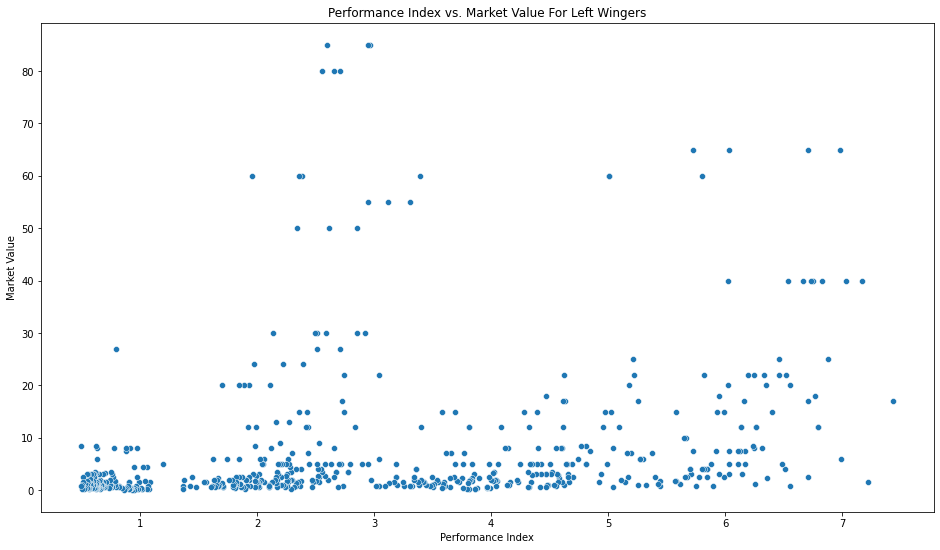

In [143]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 9))
sns.scatterplot(x='Performance_Index', y='Market_Value', data=df)
plt.title('Performance Index vs. Market Value For Left Wingers')
plt.xlabel('Performance Index')
plt.ylabel('Market Value')
plt.yticks([x for x in range(0, math.ceil(df['Market_Value'].max()), 10)])
plt.show()

c:\Users\anubh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\anubh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\anubh\AppData\Local\Temp\ipykernel_29196\3699619689.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='G+A/90', y='Market_Value', data=df,  palette='Set1')


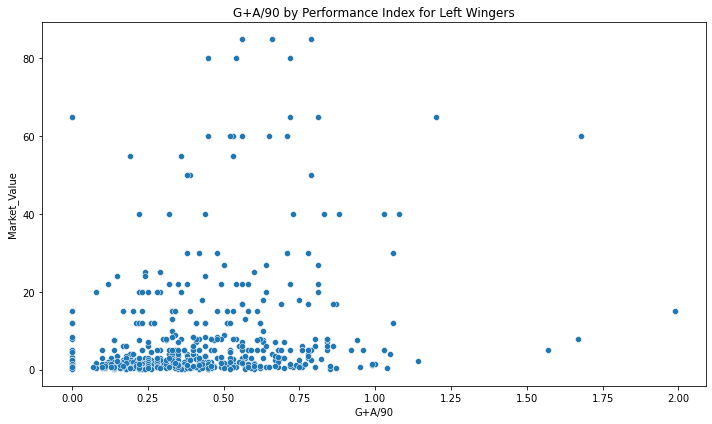

In [144]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='G+A/90', y='Market_Value', data=df,  palette='Set1')
plt.title('G+A/90 by Performance Index for Left Wingers')
plt.xlabel('G+A/90')
plt.ylabel('Market_Value')

plt.tight_layout()
plt.show()

# Scouting Data Index Generation

In [236]:
df['Injury Prone'] = df['Injury Prone'].replace({0: 40, 1: -25, 2: -50})

In [214]:
df[['OVR', 'POT', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Acceleration', 'Sprint Speed', 'Positioning', 'Finishing', 'Shot Power', 'Long Shots', 'Volleys', 'Penalties', 'Vision', 'Crossing', 
           'Free Kick Accuracy', 'Short Passing', 'Long Passing', 'Curve', 'Dribbling', 'Agility', 'Balance', 'Reactions', 'Ball Control', 'Composure', 'Interceptions', 'Heading Accuracy', 'Def Awareness', 'Standing Tackle',
            'Sliding Tackle', 'Jumping', 'Stamina', 'Strength', 'Aggression', 'Attacking Work Rate', 'Defensive Work Rate', 'Injury Prone'
]].dtypes

OVR                    int64
POT                    int64
PAC                    int64
SHO                    int64
PAS                    int64
DRI                    int64
DEF                    int64
PHY                    int64
Acceleration           int64
Sprint Speed           int64
Positioning            int64
Finishing              int64
Shot Power             int64
Long Shots             int64
Volleys                int64
Penalties              int64
Vision                 int64
Crossing               int64
Free Kick Accuracy     int64
Short Passing          int64
Long Passing           int64
Curve                  int64
Dribbling              int64
Agility                int64
Balance                int64
Reactions              int64
Ball Control           int64
Composure              int64
Interceptions          int64
Heading Accuracy       int64
Def Awareness          int64
Standing Tackle        int64
Sliding Tackle         int64
Jumping                int64
Stamina       

In [288]:
from sklearn.preprocessing import StandardScaler
# Define metrics to include in the Performance Index, excluding 'league_score' for now

metrics = ['OVR', 'POT', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Acceleration', 'Sprint Speed', 'Positioning', 'Finishing', 'Shot Power', 'Long Shots', 'Volleys', 'Penalties', 'Vision', 'Crossing', 
           'Free Kick Accuracy', 'Short Passing', 'Long Passing', 'Curve', 'Dribbling', 'Agility', 'Balance', 'Reactions', 'Ball Control', 'Composure', 'Interceptions', 'Heading Accuracy', 'Def Awareness', 'Standing Tackle',
            'Sliding Tackle', 'Jumping', 'Stamina', 'Strength', 'Aggression', 'Attacking Work Rate', 'Defensive Work Rate', 'Injury Prone'
]

#metrics = ['Gls','Gls/90', 'Ast/90', 'G+A/90', 'G-PK/90', 'G+A-PK/90', 'xG/90', 'xAG/90',
#       'npxG/90', 'xG+xAG/90', 'npxG+xAG/90', 'Sh/90', 'SoT/90', 'G/Sh',
#       'G/SoT', 'npxG/Sh', 'np:G-xG', 'SCA/90', 'GCA/90', 'Touches',
#       'Att 3rd_touch', 'Att Pen touch', 'Att takeon', 'Succ takeon',
#       'Tkld takeon', 'Carries', 'TotDist Carry', 'PrgDist Carry', 'PrgC',
#       '1/3-Carr', 'Pen Carry', 'Miscontrol', 'Dispossesed', 'PrgR', 'Tkl',
#       'TklW', 'Blocks', 'Aerials_Won', 'Aerials_Lost']

weights = {
    'OVR': 10,
    'POT': 9,
    'PAC': 10,
    'SHO': 8,
    'PAS' : 6,
    'DRI': 9,
    'DEF' : 2,
    'PHY' : 6,
    'Acceleration': 9,
    'Sprint Speed': 9,
    'Positioning' : 5,
    'Finishing': 8,
    'Shot Power': 4,
    'Long Shots' : 2, 
    'Volleys' : 2,
    'Penalties' : 3,
    'Vision' : 6,
    'Crossing' : 8,
    'Free Kick Accuracy' : 5,
    'Short Passing' : 8,
    'Long Passing' : 5,
    'Curve' : 9,
    'Dribbling' : 9,
    'Agility' : 9,
    'Balance' : 9,
    'Reactions' : 6,
    'Ball Control' : 9,
    'Composure': 6,
    'Interceptions' : 2,
    'Heading Accuracy' : 5,
    'Def Awareness' : 3,
    'Standing Tackle' : 2,
    'Sliding Tackle' : 2,
    'Jumping': 5, 
    'Stamina': 8, 
    'Strength' : 5, 
    'Aggression': 6,
    'Attacking Work Rate' : 6,
    'Defensive Work Rate' : 5, 
    'Injury Prone' : 10
 
}

# Standardize metrics
#scaler = StandardScaler()
#df = scaler.fit_transform(df[metrics])

# Create a weighted sum of the metrics
weighted_metrics = df[metrics].multiply([weights[metric] for metric in metrics], axis=1)

# Calculate the weighted mean for each row
df['Scouting_Index'] = weighted_metrics.sum(axis=1) / sum(weights.values())

df

,Player,Season,Age,Squad,Country,Comp,LgRank,MP,Starts,Min,...,Scouting_Index,Performance_Index_Overall,Linear Reg Predicted Price,Decision Tree Predicted Price,Decision Tree Predicted Price 2,Poly Reg Pred Price,XGB Reg Pred Price,Ridge Reg Pred Price,Lasso Reg Pred Price,Random Forest Reg Pred Price
2,Gabriel Martinelli,2024-2025,23,Arsenal,engÃ‚Â ENG,1. Premier League,3rd,14,10,856,...,77.472,9.771855,36.267038,60.000,60.0000,1.811707e+12,71.950203,39.235585,21.596963,53.400
3,Jack Grealish,2024-2025,28,Manchester City,engÃ‚Â ENG,1. Premier League,5th,12,5,483,...,76.556,7.626001,30.817540,55.000,30.0000,2.058164e+12,54.875996,30.583608,20.122178,45.400
7,Jadon Sancho,2024-2025,24,Chelsea,engÃ‚Â ENG,1. Premier League,2nd,10,7,580,...,72.216,7.095219,22.486341,30.000,30.0000,1.829496e+12,28.803408,23.668338,14.093560,37.300
11,Desire Doue,2024-2025,19,Paris S-G,fr FRA,1. Ligue 1,1st,10,3,403,...,71.476,6.574770,22.277082,40.000,50.0000,1.695870e+12,24.777700,27.819927,15.391463,38.000
15,Luis Diaz,2024-2025,27,Liverpool,engÃ‚Â ENG,1. Premier League,1st,15,10,880,...,77.352,7.141580,30.436584,80.000,30.0000,2.079972e+12,56.000465,31.365481,20.773693,44.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,Jan Mlakar,2024-2025,25,Pisa,it ITA,2. Serie B,3rd,8,1,207,...,65.008,0.980850,2.464668,2.075,1.6500,2.147016e+12,1.191064,3.636324,7.302344,4.390
571,Jannik Rochelt,2024-2025,25,Hannover 96,de GER,2. 2. Bundesliga,4th,13,9,666,...,68.192,1.081351,6.415328,1.200,1.6500,2.209664e+12,2.444728,8.544769,10.639846,5.190
572,Ousseynou Niang,2024-2025,22,Union SG,be BEL,1. Pro League A,7th,7,4,354,...,57.232,0.504337,-9.651705,0.350,1.0000,1.863986e+12,0.852609,-8.911786,-2.305668,0.495
573,Henok Teklab,2024-2025,25,Union SG,be BEL,1. Pro League A,7th,3,3,212,...,63.360,1.362451,1.062953,1.100,0.9625,2.111319e+12,0.652182,1.476216,5.356631,0.960


In [289]:
df.sort_values(by='Scouting_Index', ascending=False)

,Player,Season,Age,Squad,Country,Comp,LgRank,MP,Starts,Min,...,Scouting_Index,Performance_Index_Overall,Linear Reg Predicted Price,Decision Tree Predicted Price,Decision Tree Predicted Price 2,Poly Reg Pred Price,XGB Reg Pred Price,Ridge Reg Pred Price,Lasso Reg Pred Price,Random Forest Reg Pred Price
2,Gabriel Martinelli,2024-2025,23,Arsenal,engÃ‚Â ENG,1. Premier League,3rd,14,10,856,...,77.472,9.771855,36.267038,60.000000,60.00,1.811707e+12,71.950203,39.235585,21.596963,53.400
15,Luis Diaz,2024-2025,27,Liverpool,engÃ‚Â ENG,1. Premier League,1st,15,10,880,...,77.352,7.141580,30.436584,80.000000,30.00,2.079972e+12,56.000465,31.365481,20.773693,44.400
139,Lucas Ocampos,2024-2025,30,Monterrey,mx MEX,1. Liga MX,5th,10,8,736,...,77.244,5.694904,29.307207,7.500000,7.50,2.339671e+12,7.800337,29.047792,22.086826,11.480
318,Khvicha Kvaratskhelia,2024-2025,23,Napoli,itÃ‚Â ITA,1. Serie A,2nd,15,14,1086,...,76.592,2.837294,20.415394,85.000000,85.00,2.193945e+12,83.394897,26.092715,20.126042,16.700
3,Jack Grealish,2024-2025,28,Manchester City,engÃ‚Â ENG,1. Premier League,5th,12,5,483,...,76.556,7.626001,30.817540,55.000000,30.00,2.058164e+12,54.875996,30.583608,20.122178,45.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,Tim Rossmann,2024-2025,20,DÃƒÆ’Ã†â€™Ãƒâ€šÃ‚Â¼sseldorf,de GER,2. 2. Bundesliga,8th,14,10,854,...,56.400,1.125310,-9.382828,0.566667,0.35,1.776239e+12,0.676448,-7.635847,-2.985587,1.270
553,Tristan Degreef,2024-2025,19,RSC Anderlecht U23,be BEL,2. Pro League B,14th,4,4,360,...,56.260,0.599277,-10.460084,1.066667,1.00,1.744975e+12,1.107604,-7.695109,-2.878685,1.110
574,Adam Nhaili,2024-2025,18,Sint-Truiden,be BEL,1. Pro League A,12th,7,1,200,...,53.260,0.502892,-14.182954,0.225000,1.00,1.658013e+12,1.107604,-11.539887,-5.913782,1.125
488,Charles Sagoe Jr,2024-2025,20,Shrewsbury,eng ENG,3. League One,24th,10,3,351,...,52.980,0.754699,-14.022441,0.566667,0.35,1.698635e+12,0.676448,-13.146896,-6.444114,1.025


In [217]:
scout_sys = df[['Player', 'Comp', 'Squad', 'Nation', 'Height', 'Weight', 'Market_Value', 'Performance_Index', 'Scouting_Index']]
scout_sys

,Player,Comp,Squad,Nation,Height,Weight,Market_Value,Performance_Index,Scouting_Index
0,Ayrton Preciado,1. Liga MX,Queretaro,Ecuador,181cm,72kg,0.6,4.132374,63.878049
1,Ayrton Preciado,1. Liga MX,Queretaro,Ecuador,181cm,72kg,0.6,4.670548,63.878049
2,Mauro Lainez,1. Liga MX,FC JuÃƒÆ’Ã†â€™Ãƒâ€šÃ‚Â¡rez,Mexico,180cm,75kg,0.6,4.415631,66.235772
3,Mauro Lainez,1. Liga MX,AmÃƒÆ’Ã†â€™Ãƒâ€šÃ‚Â©rica,Mexico,180cm,75kg,0.6,4.453373,66.235772
4,Mauro Lainez,1. Liga MX,QuerÃƒÆ’Ã†â€™Ãƒâ€šÃ‚Â©taro,Mexico,180cm,75kg,0.6,4.327590,66.235772
...,...,...,...,...,...,...,...,...,...
798,Kerwin Vargas,1. MLS,Charlotte,Colombia,182cm,74kg,2.5,4.706648,62.634146
799,Kerwin Vargas,1. MLS,Charlotte,Colombia,182cm,74kg,2.5,4.319509,62.634146
800,Robert Taylor,1. MLS,Inter Miami,Finland,182cm,78kg,2.0,4.403864,66.792683
801,Robert Taylor,1. MLS,Inter Miami,Finland,182cm,78kg,2.0,4.787359,66.792683


In [242]:
mean_performance = df.groupby('Player')['Performance_Index'].mean().reset_index()
df = df.merge(mean_performance, on='Player', how='left', suffixes=('', '_Overall'))
df

,Player,Season,Age,Squad,Country,Comp,LgRank,MP,Starts,Min,...,CPA/90,Miscontrol/90,Dispossesed/90,Pass_Rec/90,PrgC/90,PrgR/90,npG-npxG/90,Performance_Index,Scouting_Index,Performance_Index_Overall
0,Gabriel Martinelli,2023-2024,22,Arsenal,engÃ‚Â ENG,1. Premier League,2nd,35,24,2019,...,2.184250,3.655275,2.407132,1.827637,132.882615,42.615156,-0.04,10.305343,75.813008,9.771855
1,Gabriel Martinelli,2022-2023,21,Arsenal,engÃ‚Â ENG,1. Premier League,2nd,36,34,2789,...,2.097526,2.258874,2.678379,1.807099,106.392972,35.980638,0.19,9.506871,75.813008,9.771855
2,Gabriel Martinelli,2024-2025,23,Arsenal,engÃ‚Â ENG,1. Premier League,3rd,14,10,856,...,1.787383,2.523364,1.997664,1.787383,117.546729,28.808411,0.07,9.503351,75.813008,9.771855
3,Jack Grealish,2024-2025,28,Manchester City,engÃ‚Â ENG,1. Premier League,5th,12,5,483,...,6.521739,1.304348,1.304348,51.428571,10.248447,14.720497,-0.12,7.803860,74.991870,7.626001
4,Jack Grealish,2023-2024,27,Manchester City,engÃ‚Â ENG,1. Premier League,1st,20,10,1009,...,4.459861,1.694747,1.962339,51.555996,7.760159,13.022795,0.08,7.622885,74.991870,7.626001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,Jannik Rochelt,2024-2025,25,Hannover 96,de GER,2. 2. Bundesliga,4th,13,9,666,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.03,0.513133,66.430894,1.081351
572,Ousseynou Niang,2024-2025,22,Union SG,be BEL,1. Pro League A,7th,7,4,354,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.04,0.504337,54.845528,0.504337
573,Henok Teklab,2024-2025,25,Union SG,be BEL,1. Pro League A,7th,3,3,212,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.03,0.503976,61.817073,1.362451
574,Adam Nhaili,2024-2025,18,Sint-Truiden,be BEL,1. Pro League A,12th,7,1,200,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.03,0.502892,51.321138,0.502892


In [243]:
df = df[df['Comp'].isin(['1. Premier League', '1. Ligue 1', '1. Bundesliga', '1. La Liga', '1. Eredivisie', '1. Liga MX', '2. Championship', '2. Ligue 2', 
                               '2. La Liga 2', '1. Pro League A', '1. Primeira Liga', '2. 2. Bundesliga', '2. Serie B', '1. Serie A', '4. League Two', '3. League One',
                              '5. National League', '2. Eerste Divisie', 'Jr. PL2', '3. 3. Liga', '2. Pro League B', '1. MLS'])]

In [244]:
df['Comp'].unique()

array(['1. Premier League', '1. Ligue 1', '1. Bundesliga', '1. La Liga',
       '1. Eredivisie', '1. Liga MX', '1. MLS', '2. Championship',
       '2. Ligue 2', '2. La Liga 2', '1. Pro League A', '1. Serie A',
       '1. Primeira Liga', '2. 2. Bundesliga', '2. Serie B',
       '4. League Two', '3. League One', '5. National League',
       '2. Eerste Divisie', 'Jr. PL2', '3. 3. Liga', '2. Pro League B'],
      dtype=object)

In [224]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Market_Value_normalized'] = scaler.fit_transform(df[['Market_Value']])
df

c:\Users\anubh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\anubh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\anubh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\anubh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_

,Player,Season,Age,Squad,Country,Comp,LgRank,MP,Starts,Min,...,Miscontrol/90,Dispossesed/90,Pass_Rec/90,PrgC/90,PrgR/90,npG-npxG/90,Performance_Index,Scouting_Index,Performance_Index_Overall,Market_Value_normalized
0,Ayrton Preciado,2023-2024,29,Queretaro,mx MEX,1. Liga MX,10th,4,0,34,...,5.294118,2.647059,42.352941,2.647059,18.529412,0.00,4.132374,63.878049,4.401461,0.005889
1,Ayrton Preciado,2024-2025,30,Queretaro,mx MEX,1. Liga MX,17th,5,1,132,...,4.772727,0.000000,39.545455,4.090909,8.181818,0.59,4.670548,63.878049,4.401461,0.005889
2,Mauro Lainez,2022-2023,26,FC JuÃƒÆ’Ã†â€™Ãƒâ€šÃ‚Â¡rez,mx MEX,1. Liga MX,13th,26,3,676,...,1.730769,2.795858,32.884615,4.792899,8.254438,0.07,4.415631,66.235772,4.559723,0.005889
3,Mauro Lainez,2023-2024,27,AmÃƒÆ’Ã†â€™Ãƒâ€šÃ‚Â©rica,mx MEX,1. Liga MX,1st,1,0,24,...,0.000000,0.000000,52.500000,7.500000,3.750000,0.00,4.453373,66.235772,4.559723,0.005889
4,Mauro Lainez,2023-2024,27,QuerÃƒÆ’Ã†â€™Ãƒâ€šÃ‚Â©taro,mx MEX,1. Liga MX,10th,8,0,199,...,3.165829,0.452261,31.206030,3.618090,4.522613,-0.18,4.327590,66.235772,4.559723,0.005889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,Kerwin Vargas,2023-2024,21,Charlotte,usÃ‚Â USA,1. MLS,18th,29,18,1489,...,1.571525,0.664876,39.590329,2.840833,10.335796,0.14,4.706648,62.634146,4.486103,0.028269
799,Kerwin Vargas,2024-2025,22,Charlotte,usÃ‚Â USA,1. MLS,11th,33,29,2453,...,1.394211,0.587036,28.838157,1.761109,8.842234,0.05,4.319509,62.634146,4.486103,0.028269
800,Robert Taylor,2022-2023,27,Inter Miami,usÃ‚Â USA,1. MLS,12th,33,26,2222,...,2.106211,0.648065,31.309631,3.078308,6.156616,-0.03,4.403864,66.792683,4.541377,0.022379
801,Robert Taylor,2023-2024,28,Inter Miami,usÃ‚Â USA,1. MLS,27th,27,15,1457,...,1.976664,0.864791,41.448181,3.026767,9.203844,0.19,4.787359,66.792683,4.541377,0.022379


In [245]:
df = df[df['MP'] != 0]

# What Influences Player Valuations

 - Age
 - Macro trends & market inflation
 - Rating & Potential
 - Skills
 - Clubs
 - Leagues
 - Player position
 - Nationality
 - National team participation
 - Years left in the contract
 

# Linear Regression

In [290]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[['Performance_Index_Overall', 'Scouting_Index']]
y = df['Market_Value'] 

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# Train the logistic regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
df['Linear Reg Predicted Price'] = model.predict(df[['Performance_Index_Overall', 'Scouting_Index']])


c:\Users\anubh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\anubh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\anubh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\anubh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_

# Decision Tree Classifier

In [291]:
from sklearn.tree import DecisionTreeRegressor

X = df[['Performance_Index_Overall', 'Scouting_Index', 'Age']]
y = df['Market_Value'] 

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# Use DecisionTreeRegressor since you're predicting a continuous value (e.g., price)
dt = DecisionTreeRegressor(random_state=15, criterion='mse', max_depth=10)
dt.fit(X_train, y_train)

# Make predictions
df['Decision Tree Predicted Price'] = dt.predict(df[['Performance_Index_Overall', 'Scouting_Index', 'Age']])

c:\Users\anubh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\anubh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\anubh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\anubh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criter

In [273]:
df = df[df['Season'] == '2024-2025']
df[['Player', 'Season', 'Squad', 'Comp', 'MP', 'Performance_Index', 'Scouting_Index', 'Market_Value', 'Linear Reg Predicted Price', 'Decision Tree Predicted Price' ]]

,Player,Season,Squad,Comp,MP,Performance_Index,Scouting_Index,Market_Value,Linear Reg Predicted Price,Decision Tree Predicted Price
2,Gabriel Martinelli,2024-2025,Arsenal,1. Premier League,14,9.503351,75.813008,60.00,36.267038,60.000
3,Jack Grealish,2024-2025,Manchester City,1. Premier League,12,7.803860,74.991870,55.00,30.817540,55.000
7,Jadon Sancho,2024-2025,Chelsea,1. Premier League,10,7.421583,69.353659,30.00,22.486341,30.000
11,Desire Doue,2024-2025,Paris S-G,1. Ligue 1,10,7.164979,70.020325,40.00,22.277082,40.000
15,Luis Diaz,2024-2025,Liverpool,1. Premier League,15,7.058680,75.467480,80.00,30.436584,80.000
...,...,...,...,...,...,...,...,...,...,...
570,Jan Mlakar,2024-2025,Pisa,2. Serie B,8,0.516145,63.516260,2.50,2.464668,2.075
571,Jannik Rochelt,2024-2025,Hannover 96,2. 2. Bundesliga,13,0.513133,66.430894,1.50,6.415328,1.200
572,Ousseynou Niang,2024-2025,Union SG,1. Pro League A,7,0.504337,54.845528,0.80,-9.651705,0.350
573,Henok Teklab,2024-2025,Union SG,1. Pro League A,3,0.503976,61.817073,1.00,1.062953,1.100


# Decision Tree Regressor # 2

In [292]:
X = df[['Performance_Index_Overall', 'Scouting_Index', 'Age']]
y = df['Market_Value'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# Use DecisionTreeRegressor since you're predicting a continuous value (e.g., price)
dt = DecisionTreeRegressor(random_state=15, criterion='mse', max_depth=10)
dt.fit(X_train, y_train)
# Make predictions
df['Decision Tree Predicted Price 2'] = dt.predict(df[['Performance_Index_Overall', 'Scouting_Index', 'Age']])

c:\Users\anubh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\anubh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\anubh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\anubh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criter

# Polynomial Regression

In [293]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = df[['Performance_Index_Overall', 'Scouting_Index', 'Age']]
y = df['Market_Value'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty='l1', alpha=0.0001, eta0=0.01, learning_rate='invscaling', power_t=0.25)

sgd_reg.fit(X_train, y_train)


df['Poly Reg Pred Price'] = sgd_reg.predict(df[['Performance_Index', 'Scouting_Index', 'Age']])

c:\Users\anubh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\anubh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\anubh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\anubh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature nam

# XGB Regressor

In [294]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3)

X = df[['Performance_Index_Overall', 'Scouting_Index', 'Age']]
y = df['Market_Value'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

xgb_model.fit(X_train, y_train)

df['XGB Reg Pred Price'] = xgb_model.predict(df[['Performance_Index_Overall', 'Scouting_Index', 'Age']])

c:\Users\anubh\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\anubh\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\anubh\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\anubh\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

# Ridge Regression

In [295]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso
#Ridge Regression Model
ridgeReg = Ridge(alpha=15)

X = df[['Performance_Index_Overall', 'Scouting_Index', 'Age']]
y = df['Market_Value'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

ridgeReg.fit(X_train,y_train)

df['Ridge Reg Pred Price'] = ridgeReg.predict(df[['Performance_Index_Overall', 'Scouting_Index', 'Age']])

c:\Users\anubh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\anubh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\anubh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\anubh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_

# Lasso Regression

In [296]:
lasso = Lasso(alpha = 10)

X = df[['Performance_Index_Overall', 'Scouting_Index', 'Age']]
y = df['Market_Value'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

lasso.fit(X_train,y_train)

df['Lasso Reg Pred Price'] = lasso.predict(df[['Performance_Index_Overall', 'Scouting_Index', 'Age']])

c:\Users\anubh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\anubh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\anubh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\anubh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_

# Random Forest Regressor

In [297]:
from sklearn.ensemble import RandomForestRegressor

RF_regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

X = df[['Performance_Index_Overall', 'Scouting_Index', 'Age']]
y = df['Market_Value'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# Fit the regressor with x and y data
RF_regressor.fit(X_train, y_train)

df['Random Forest Reg Pred Price'] = RF_regressor.predict(df[['Performance_Index_Overall', 'Scouting_Index', 'Age']])

c:\Users\anubh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\anubh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\anubh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\anubh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some 

# GBM Regressor

In [301]:
from sklearn import datasets, ensemble

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

X = df[['Performance_Index_Overall', 'Scouting_Index', 'Age']]
y = df['Market_Value'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

GBM_reg = ensemble.GradientBoostingRegressor(**params)

GBM_reg.fit(X_train, y_train)

df['GBM Reg Pred Price'] = GBM_reg.predict(df[['Performance_Index_Overall', 'Scouting_Index', 'Age']])

c:\Users\anubh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\anubh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\anubh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\anubh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_

In [308]:
X_train

Index([ 63, 126, 303, 530, 453, 488, 176, 461, 500, 510,
       ...
       359, 573, 242,  15, 240, 565, 487, 216, 354,  26],
      dtype='int64', length=112)

In [303]:
df[['Player', 'Season', 'Squad', 'Age', 'Nation', 'Performance_Index_Overall', 'Scouting_Index', 'Market_Value', 'Linear Reg Predicted Price', 'Decision Tree Predicted Price', 'Decision Tree Predicted Price 2', 'XGB Reg Pred Price', 'Ridge Reg Pred Price', 'Lasso Reg Pred Price', 'Random Forest Reg Pred Price', 'GBM Reg Pred Price']]

,Player,Season,Squad,Age,Nation,Performance_Index_Overall,Scouting_Index,Market_Value,Linear Reg Predicted Price,Decision Tree Predicted Price,Decision Tree Predicted Price 2,XGB Reg Pred Price,Ridge Reg Pred Price,Lasso Reg Pred Price,Random Forest Reg Pred Price,GBM Reg Pred Price
2,Gabriel Martinelli,2024-2025,Arsenal,23,Brazil,9.771855,77.472,60.00,44.408434,60.000000,65.000000,46.723385,33.542162,23.851247,65.500,60.626216
3,Jack Grealish,2024-2025,Manchester City,28,England,7.626001,76.556,55.00,37.056756,55.000000,55.000000,54.838387,25.934282,22.226340,61.500,54.668881
7,Jadon Sancho,2024-2025,Chelsea,24,England,7.095219,72.216,30.00,29.099029,30.000000,30.000000,47.595345,21.977327,16.968410,53.500,29.487655
11,Desire Doue,2024-2025,Paris S-G,19,France,6.574770,71.476,40.00,26.543106,24.000000,40.000000,32.408825,25.415118,16.452525,56.000,18.252939
15,Luis Diaz,2024-2025,Liverpool,27,Columbia,7.141580,77.352,80.00,36.893786,80.000000,55.000000,46.633835,28.122427,23.343518,68.500,78.031829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,Jan Mlakar,2024-2025,Pisa,25,Slovenia,0.980850,65.008,2.50,1.288812,2.500000,1.900000,2.207630,5.361018,7.562129,1.880,1.724386
571,Jannik Rochelt,2024-2025,Hannover 96,25,Germany,1.081351,68.192,1.50,6.321204,1.500000,1.318182,2.588995,11.060426,11.678240,2.150,1.724386
572,Ousseynou Niang,2024-2025,Union SG,22,Ghana,0.504337,57.232,0.80,-11.645780,0.766667,0.200000,0.883031,-5.669707,-2.225835,0.875,0.939409
573,Henok Teklab,2024-2025,Union SG,25,Germany,1.362451,63.360,1.00,-0.106580,1.345455,1.100000,0.968959,2.611096,5.431679,0.955,1.100177


c:\Users\anubh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\anubh\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\anubh\AppData\Local\Temp\ipykernel_29196\1173146130.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Performance_Index_Overall', y='Scouting_Index', data=df,  palette='Set1')


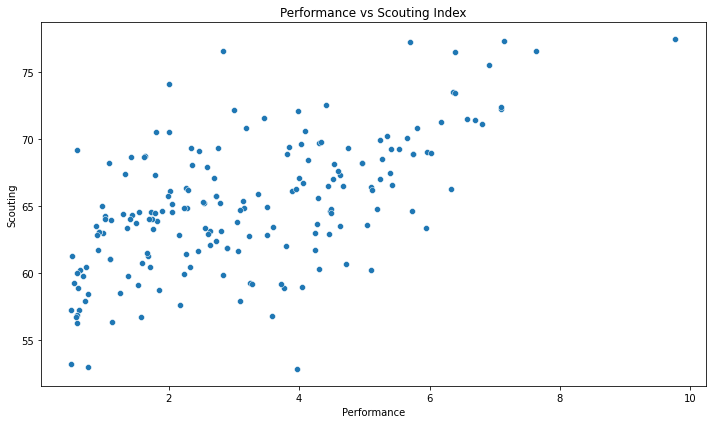

In [300]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Performance_Index_Overall', y='Scouting_Index', data=df,  palette='Set1')
plt.title('Performance Index vs Scouting Index')
plt.xlabel('Performance')
plt.ylabel('Scouting')

plt.tight_layout()
plt.show()

In [311]:
df['underrated_score'] = df['XGB Reg Pred Price'] - df['Market_Value']

undervalued_players = df[df['underrated_score'] > 0].sort_values(by='underrated_score', ascending=False)

#undervalued_players = undervalued_players[undervalued_players['Age'] < 28.0]
undervalued_players[['Player', 'Age', 'Market_Value', 'Performance_Index_Overall', 'Scouting_Index','XGB Reg Pred Price', 'underrated_score']].head(20)

,Player,Age,Market_Value,Performance_Index_Overall,Scouting_Index,XGB Reg Pred Price,underrated_score
120,Timo Werner,28,17.0,6.388473,73.476,56.569233,39.569233
38,Leandro Trossard,29,30.0,6.907834,75.552,54.987232,24.987232
7,Jadon Sancho,24,30.0,7.095219,72.216,47.595345,17.595345
233,Heriberto Jurado,19,2.0,4.025740,69.648,19.254375,17.254375
152,Carlos Rotondi,27,5.0,4.409513,72.540,21.409821,16.409821
98,Sheraldo Becker,29,7.5,5.963007,69.020,19.247513,11.747513
385,Myrto Uzuni,29,6.0,3.458543,71.608,12.991858,6.991858
62,Keane Lewis-Potter,23,20.0,6.326686,66.292,23.152195,3.152195
129,Sayfallah Ltaief,24,2.0,5.111222,66.196,5.114678,3.114678
302,Christopher Bonsu Baah,19,3.5,2.726115,65.760,6.099833,2.599833
